In [70]:
import pandas as pd
import numpy as np
import missingno as msno
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

## Importing the data 

In [71]:
data = pd.read_csv("dataset.csv", delimiter=";", parse_dates=[0])
data
#It is common to get an problem here, if you do not specify the delimiter. Generally, pandas use ',' as delimiter, but 
#in this dataset, we use ';', so we have to tell him

,Date,Service,Departure station,Arrival station,Average journey time,Number of scheduled trains,Number of cancelled trains,Cancellation comments,Number of trains delayed at departure,Average delay of late trains at departure,...,Number of trains delayed > 15min,Average delay of trains > 15min (if competing with flights),Number of trains delayed > 30min,Number of trains delayed > 60min,Pct delay due to external causes,Pct delay due to infrastructure,Pct delay due to traffic management,Pct delay due to rolling stock,Pct delay due to station management and equipment reuse,"Pct delay due to passenger handling (crowding, disabled persons, connections)"
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141.000000,NaN,5.0,NaN,289.0,11.247809,...,110.0,346.474287,44.0,8.0,36.134454,31.092437,10.924370,15.966387,5.042017,75.915730
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165.000000,222.000000,NaN,NaN,8.0,2.875000,...,22.0,5.696096,5.0,NaN,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220.000000,248.000000,1.0,NaN,37.0,9.501351,...,26.0,7.548387,17.0,7.0,26.923077,38.461538,NaN,19.230769,0.000000,0.000000
3,2018j01,National,PARIS MONTPARNASSE,ST MALO,156.000000,102.000000,0.0,NaN,12.0,19.912500,...,8.0,6.724757,6.0,4.0,23.076923,218.650888,7.692308,15.384615,7.692308,NaN
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61.000000,391.000000,2.0,NaN,61.0,NaN,...,17.0,3.346487,6.0,0.0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,2020-04,National,PARIS EST,STRASBOURG,NaN,40.000000,35.0,NaN,5.0,1.253333,...,3.0,NaN,3.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
10836,2020-05,National,NaN,LYON PART DIEU,115.000000,2681.206158,14.0,NaN,46.0,6.258333,...,5.0,47.820000,3.0,1.0,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000
10837,2021-03,National,PARIS LYON,VALENCE ALIXAN TGV,130.000000,178.000000,10.0,NaN,5.0,2.946667,...,4.0,66.254167,4.0,2.0,25.000000,25.000000,198.761036,25.000000,0.000000,25.000000
10838,2019-07,National,MARNE LA VALLEE,MARSEILLE ST CHARLES,217.000000,268.000000,NaN,NaN,238.0,10.391667,...,66.0,50.361364,34.0,22.0,24.615385,15.384615,15.384615,24.615385,10.769231,9.230769


## Taking a look a the rows and columns

In [72]:
data.shape
#The first value represent the rows and the second one is the columns

(10840, 26)

# Exploring Data

## Column names

In [73]:
data.columns 

Index(['Date', 'Service', 'Departure station', 'Arrival station',
       'Average journey time', 'Number of scheduled trains',
       'Number of cancelled trains', 'Cancellation comments',
       'Number of trains delayed at departure',
       'Average delay of late trains at departure',
       'Average delay of all trains at departure', 'Departure delay comments',
       'Number of trains delayed at arrival',
       'Average delay of late trains at arrival',
       'Average delay of all trains at arrival', 'Arrival delay comments',
       'Number of trains delayed > 15min',
       'Average delay of trains > 15min (if competing with flights)',
       'Number of trains delayed > 30min', 'Number of trains delayed > 60min',
       'Pct delay due to external causes', 'Pct delay due to infrastructure',
       'Pct delay due to traffic management', 'Pct delay due to rolling stock',
       'Pct delay due to station management and equipment reuse',
       'Pct delay due to passenger handling (

## Data types

In [74]:
data.dtypes

Date                                                                              object
Service                                                                           object
Departure station                                                                 object
Arrival station                                                                   object
Average journey time                                                             float64
Number of scheduled trains                                                       float64
Number of cancelled trains                                                       float64
Cancellation comments                                                            float64
Number of trains delayed at departure                                            float64
Average delay of late trains at departure                                        float64
Average delay of all trains at departure                                         float64
Departure delay comme

## Sumarry of the dataset

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 26 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Date                                                                           10299 non-null  object 
 1   Service                                                                        10288 non-null  object 
 2   Departure station                                                              10298 non-null  object 
 3   Arrival station                                                                10293 non-null  object 
 4   Average journey time                                                           10010 non-null  float64
 5   Number of scheduled trains                                                     10018 non-null  float64
 6   Number of cancelled tr

## Taking a look at duplicated values

In [76]:
data[data.duplicated()]

,Date,Service,Departure station,Arrival station,Average journey time,Number of scheduled trains,Number of cancelled trains,Cancellation comments,Number of trains delayed at departure,Average delay of late trains at departure,...,Number of trains delayed > 15min,Average delay of trains > 15min (if competing with flights),Number of trains delayed > 30min,Number of trains delayed > 60min,Pct delay due to external causes,Pct delay due to infrastructure,Pct delay due to traffic management,Pct delay due to rolling stock,Pct delay due to station management and equipment reuse,"Pct delay due to passenger handling (crowding, disabled persons, connections)"
10326,2021-06,National,PARIS MONTPARNASSE,BREST,231.000000,234.0,1.0,NaN,39.0,5.641026,...,12.0,39.291667,3.000000,3.0,25.000000,33.333333,8.333333,16.666667,0.000000,16.666667
10332,2023-12,National,ST MALO,PARIS MONTPARNASSE,149.000000,98.0,0.0,NaN,4.0,16.587500,...,8.0,NaN,1.000000,0.0,20.000000,20.000000,20.000000,20.000000,13.333333,6.666667
10333,2018-02,International,PARIS EST,FRANCFORT,226.000000,120.0,3.0,NaN,26.0,16.445513,...,33.0,NaN,124.671697,6.0,50.000000,6.250000,18.750000,18.750000,3.125000,3.125000
10337,2024-03,National,PARIS NORD,ARRAS,49.000000,517.0,1.0,NaN,45.0,8.103333,...,11.0,25.350000,0.000000,0.0,218.895878,16.666667,11.111111,27.777778,16.666667,22.222222
10344,2018-10,National,BORDEAUX ST JEAN,NaN,NaN,59.0,0.0,NaN,9.0,21.148148,...,4.0,6.684463,2.000000,NaN,16.666667,16.666667,16.666667,50.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,2020-07,NaN,NICE VILLE,PARIS LYON,361.000000,274.0,5.0,NaN,186.0,2.997312,...,38.0,42.722807,23.000000,7.0,42.105263,21.052632,26.315789,7.894737,2.631579,0.000000
10822,2024-06,Nationab,ST MALO,PARIS MONTPARNASSE,1702.593801,95.0,0.0,NaN,3.0,3.061111,...,5.0,45.613333,3.000000,1.0,0.000000,30.000000,30.000000,20.000000,0.000000,20.000000
10823,2023-12,International,NaN,BARCELONA,NaN,62.0,0.0,NaN,3.0,7.716667,...,6.0,48.166667,5.000000,1.0,0.000000,33.333333,50.000000,16.666667,0.000000,0.000000
10824,2019-12,National,PARIS EST,REIMS,46.000000,88.0,17.0,NaN,62.0,1.802688,...,0.0,0.000000,0.000000,0.0,10.000000,10.000000,50.000000,0.000000,30.000000,0.000000


## Taking a look at missing values

In [77]:
data[data.isnull()]

,Date,Service,Departure station,Arrival station,Average journey time,Number of scheduled trains,Number of cancelled trains,Cancellation comments,Number of trains delayed at departure,Average delay of late trains at departure,...,Number of trains delayed > 15min,Average delay of trains > 15min (if competing with flights),Number of trains delayed > 30min,Number of trains delayed > 60min,Pct delay due to external causes,Pct delay due to infrastructure,Pct delay due to traffic management,Pct delay due to rolling stock,Pct delay due to station management and equipment reuse,"Pct delay due to passenger handling (crowding, disabled persons, connections)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Remove duplicated values

In [78]:
data.drop_duplicates(inplace=True)

In [79]:
data[data.duplicated()]

,Date,Service,Departure station,Arrival station,Average journey time,Number of scheduled trains,Number of cancelled trains,Cancellation comments,Number of trains delayed at departure,Average delay of late trains at departure,...,Number of trains delayed > 15min,Average delay of trains > 15min (if competing with flights),Number of trains delayed > 30min,Number of trains delayed > 60min,Pct delay due to external causes,Pct delay due to infrastructure,Pct delay due to traffic management,Pct delay due to rolling stock,Pct delay due to station management and equipment reuse,"Pct delay due to passenger handling (crowding, disabled persons, connections)"


In [80]:
data.isnull().sum()

Date                                                                               534
Service                                                                            533
Departure station                                                                  531
Arrival station                                                                    536
Average journey time                                                               820
Number of scheduled trains                                                         809
Number of cancelled trains                                                         818
Cancellation comments                                                            10662
Number of trains delayed at departure                                              816
Average delay of late trains at departure                                          802
Average delay of all trains at departure                                           812
Departure delay comments                   

## Traitement des valeurs manquantes

Puisque les données sont nombreuses et importantes, nous n'allons pas supprimer les valeurs manquantes. Nous allons y faire de l'imputation de données en les remplaçant par la moyenne ou la médiane

In [81]:
data['Departure station'].value_counts()

Departure station
PARIS LYON              2009
PARIS MONTPARNASSE      1284
LYON PART DIEU           487
PARIS EST                481
MARSEILLE ST CHARLES     431
                        ... 
PARIx LYON                 1
NANCJ                      1
VALENCE ALIXAN TxV         1
PARIz LYON                 1
PARIS MONTPARNAZSE         1
Name: count, Length: 346, dtype: int64

In [82]:
data

,Date,Service,Departure station,Arrival station,Average journey time,Number of scheduled trains,Number of cancelled trains,Cancellation comments,Number of trains delayed at departure,Average delay of late trains at departure,...,Number of trains delayed > 15min,Average delay of trains > 15min (if competing with flights),Number of trains delayed > 30min,Number of trains delayed > 60min,Pct delay due to external causes,Pct delay due to infrastructure,Pct delay due to traffic management,Pct delay due to rolling stock,Pct delay due to station management and equipment reuse,"Pct delay due to passenger handling (crowding, disabled persons, connections)"
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141.000000,NaN,5.0,NaN,289.0,11.247809,...,110.0,346.474287,44.0,8.0,36.134454,31.092437,10.924370,15.966387,5.042017,75.915730
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165.000000,222.000000,NaN,NaN,8.0,2.875000,...,22.0,5.696096,5.0,NaN,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220.000000,248.000000,1.0,NaN,37.0,9.501351,...,26.0,7.548387,17.0,7.0,26.923077,38.461538,NaN,19.230769,0.000000,0.000000
3,2018j01,National,PARIS MONTPARNASSE,ST MALO,156.000000,102.000000,0.0,NaN,12.0,19.912500,...,8.0,6.724757,6.0,4.0,23.076923,218.650888,7.692308,15.384615,7.692308,NaN
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61.000000,391.000000,2.0,NaN,61.0,NaN,...,17.0,3.346487,6.0,0.0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,2020-04,National,PARIS EST,STRASBOURG,NaN,40.000000,35.0,NaN,5.0,1.253333,...,3.0,NaN,3.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
10836,2020-05,National,NaN,LYON PART DIEU,115.000000,2681.206158,14.0,NaN,46.0,6.258333,...,5.0,47.820000,3.0,1.0,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000
10837,2021-03,National,PARIS LYON,VALENCE ALIXAN TGV,130.000000,178.000000,10.0,NaN,5.0,2.946667,...,4.0,66.254167,4.0,2.0,25.000000,25.000000,198.761036,25.000000,0.000000,25.000000
10838,2019-07,National,MARNE LA VALLEE,MARSEILLE ST CHARLES,217.000000,268.000000,NaN,NaN,238.0,10.391667,...,66.0,50.361364,34.0,22.0,24.615385,15.384615,15.384615,24.615385,10.769231,9.230769


### Detect the count/percentage of missing values in every column of the dataset

In [ ]:
mis_val = data.isnull().sum()
mis_value_percentage = 100 * mis_val / len(data)
mis_value_table = pd.concat([mis_val, mis_value_percentage], axis=1)
mis_value_table

,0,1
Date,534,5.008441
Service,533,4.999062
Departure station,531,4.980304
Arrival station,536,5.027199
Average journey time,820,7.690865
Number of scheduled trains,809,7.587695
Number of cancelled trains,818,7.672107
Cancellation comments,10662,100.000000
Number of trains delayed at departure,816,7.653348
Average delay of late trains at departure,802,7.522041


In [84]:
mis_value_table_ren_columns = mis_value_table.rename(columns = {0 : 'Missing Values', 1: '% of Total Values'})
mis_value_table_ren_columns

,Missing Values,% of Total Values
Date,534,5.008441
Service,533,4.999062
Departure station,531,4.980304
Arrival station,536,5.027199
Average journey time,820,7.690865
Number of scheduled trains,809,7.587695
Number of cancelled trains,818,7.672107
Cancellation comments,10662,100.000000
Number of trains delayed at departure,816,7.653348
Average delay of late trains at departure,802,7.522041


In [85]:
mis_value_table_ren_columns = mis_value_table_ren_columns[mis_value_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(2)
mis_value_table_ren_columns

,Missing Values,% of Total Values
Cancellation comments,10662,100.00
Departure delay comments,10662,100.00
Arrival delay comments,9984,93.64
Number of trains delayed > 15min,822,7.71
Pct delay due to infrastructure,822,7.71
Number of trains delayed > 60min,821,7.70
Average journey time,820,7.69
Number of cancelled trains,818,7.67
Number of trains delayed > 30min,817,7.66
Number of trains delayed at departure,816,7.65


In [86]:
print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
"There are " + str(mis_value_table_ren_columns.shape[0]) +
    " columns that have missing values.")

Your selected dataframe has 26 columns.
There are 26 columns that have missing values.


<Axes: >

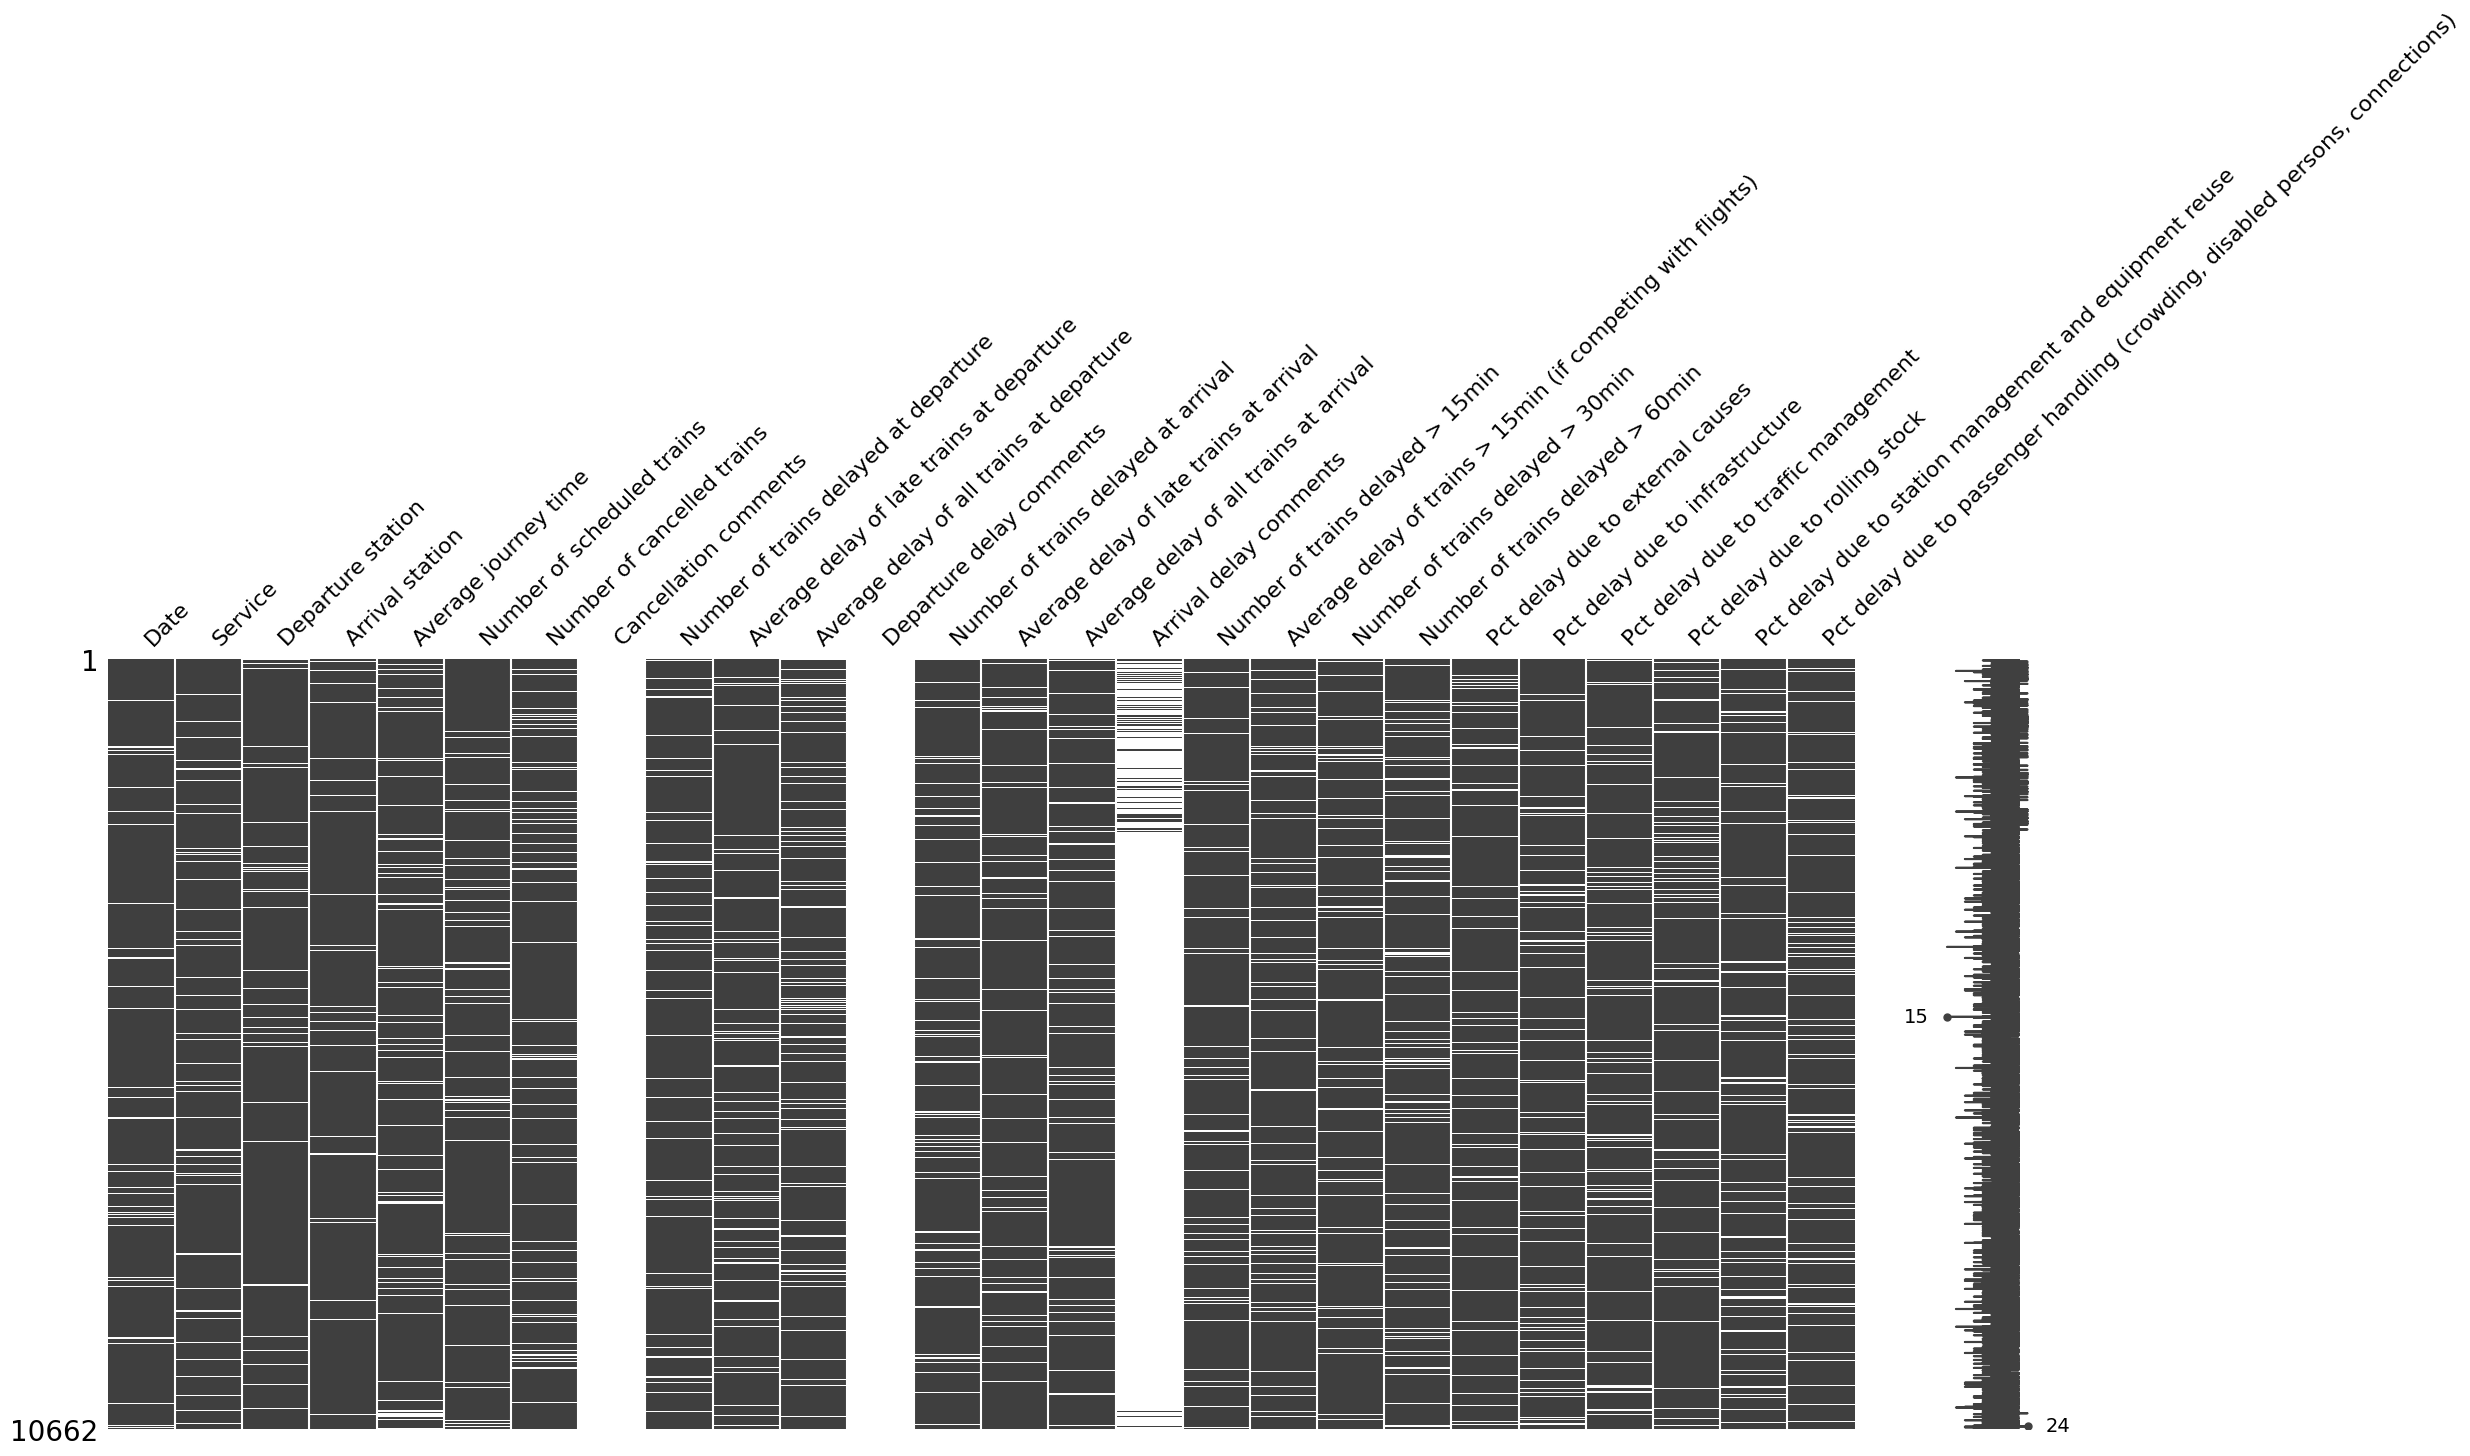

In [87]:
msno.matrix(data)

### Pourquoi les données sont manquantes ?

<Axes: >

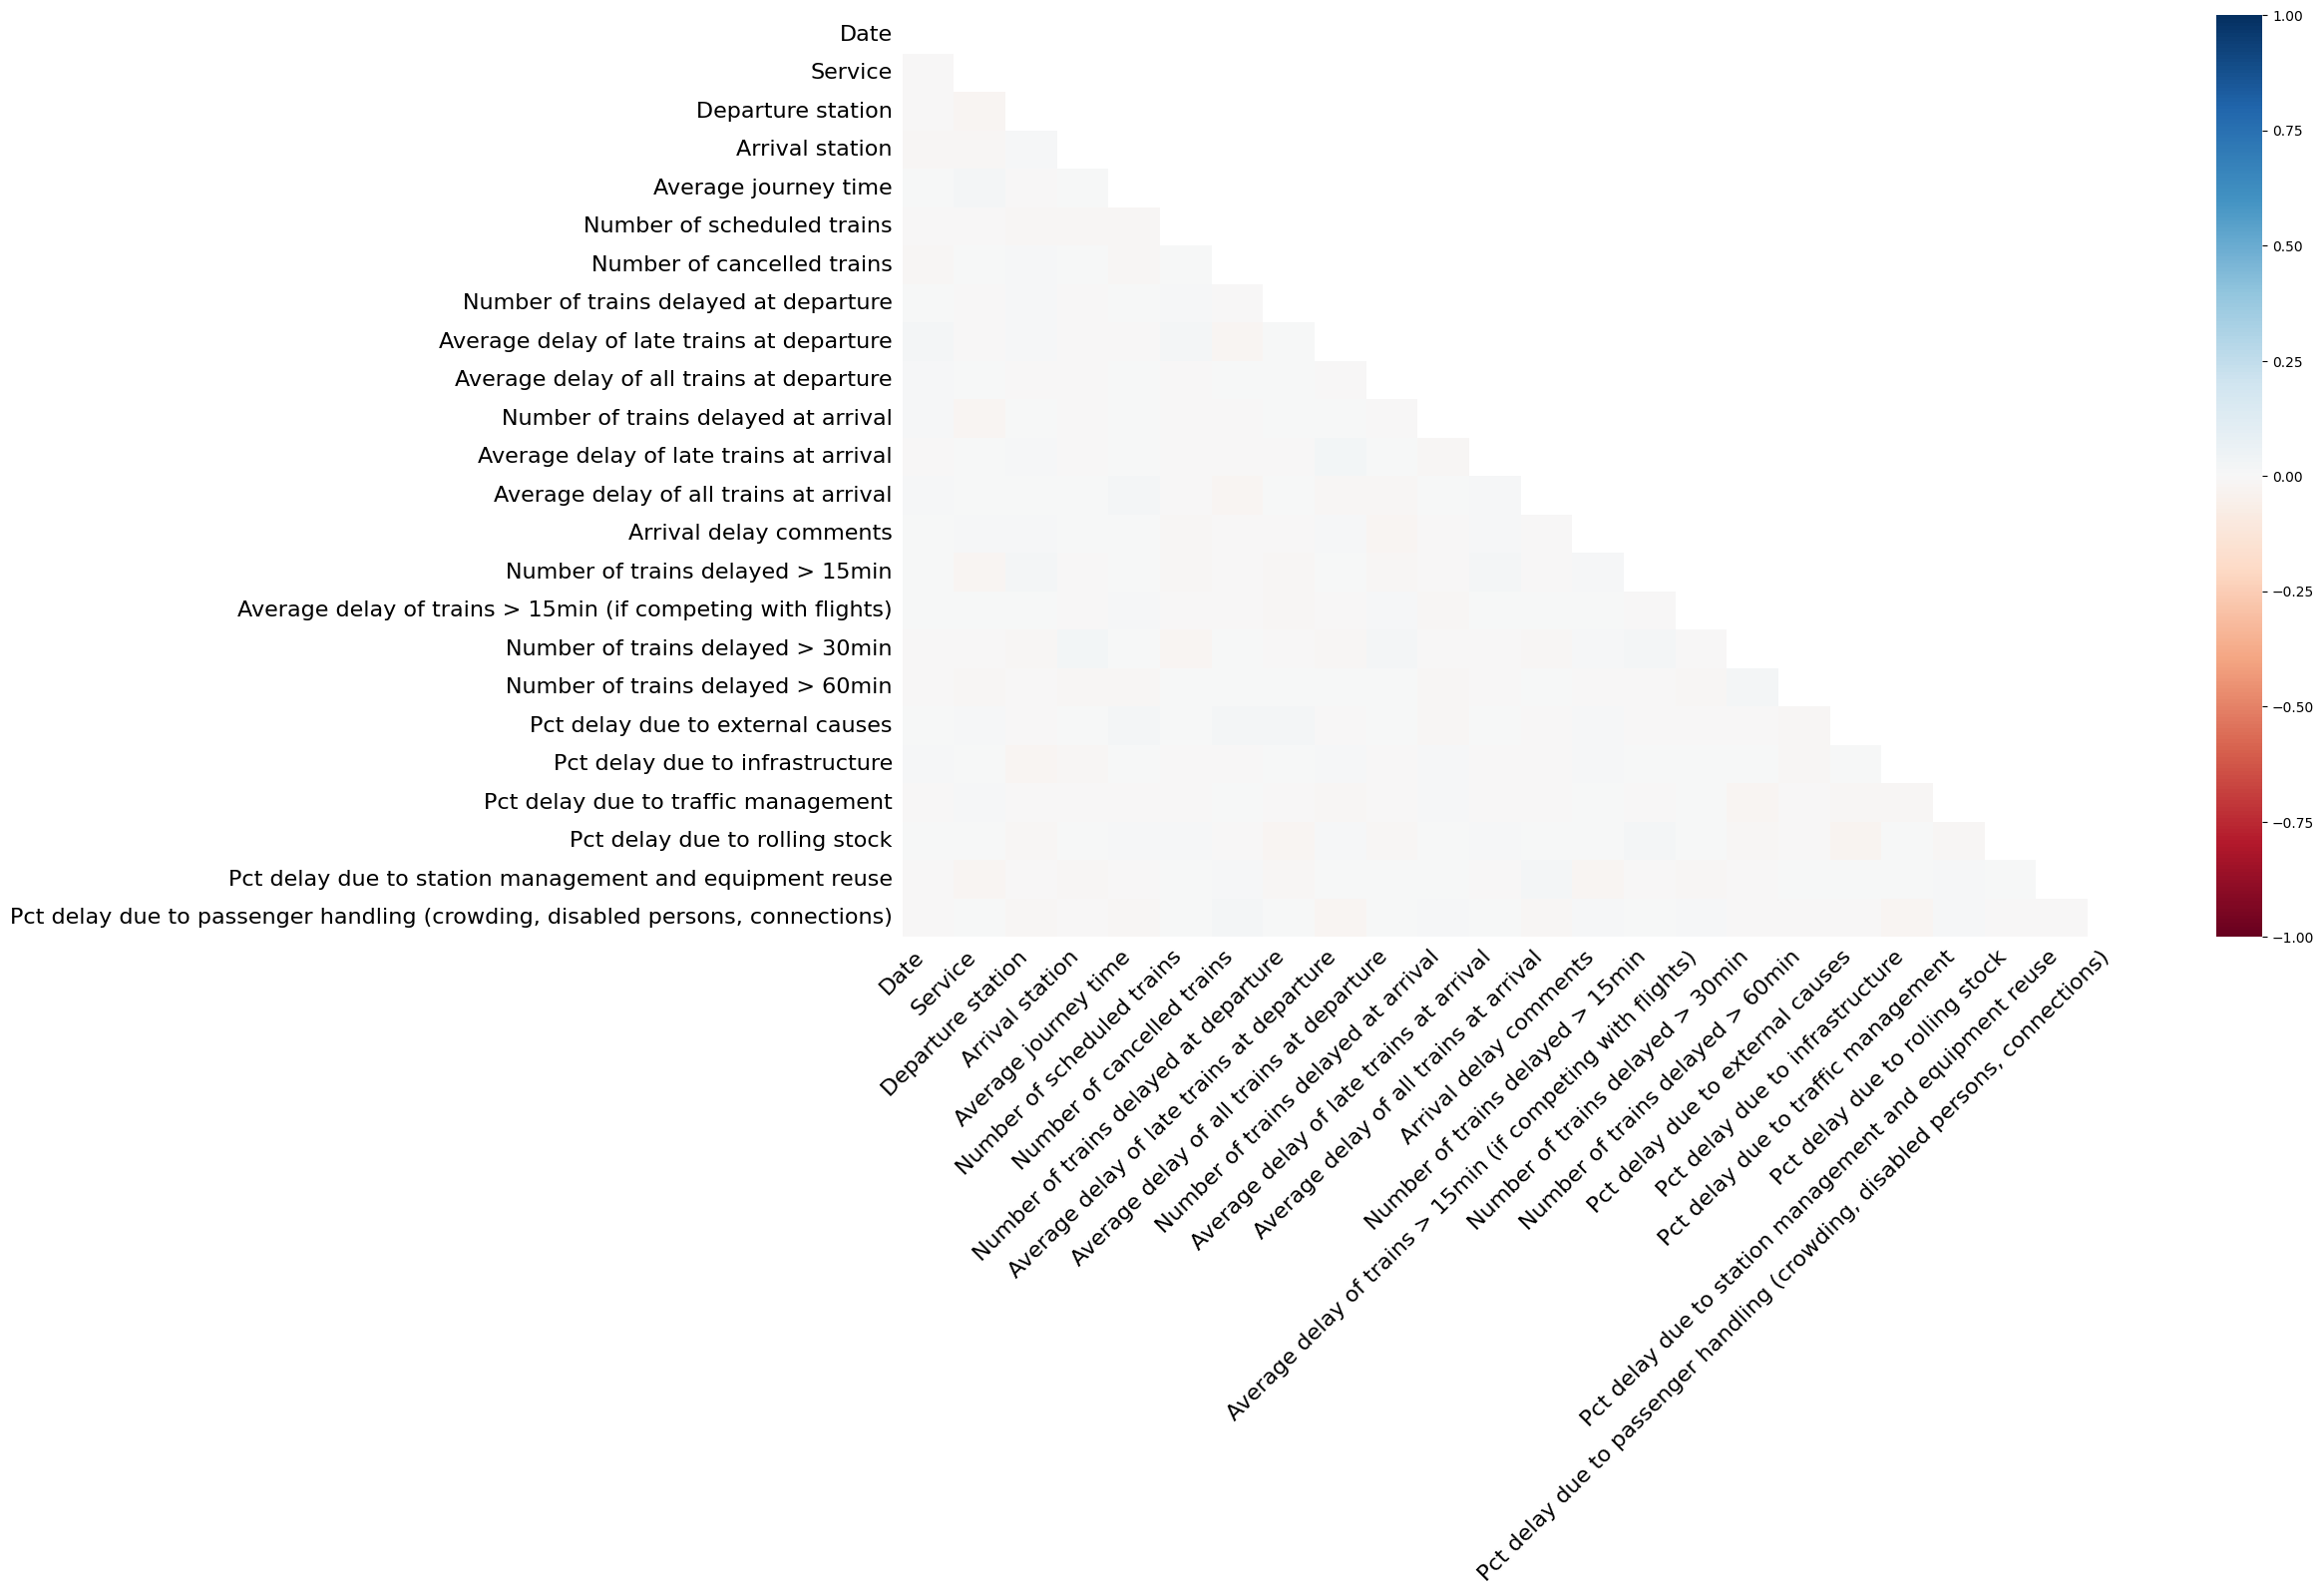

In [88]:
msno.heatmap(data)

<Axes: >

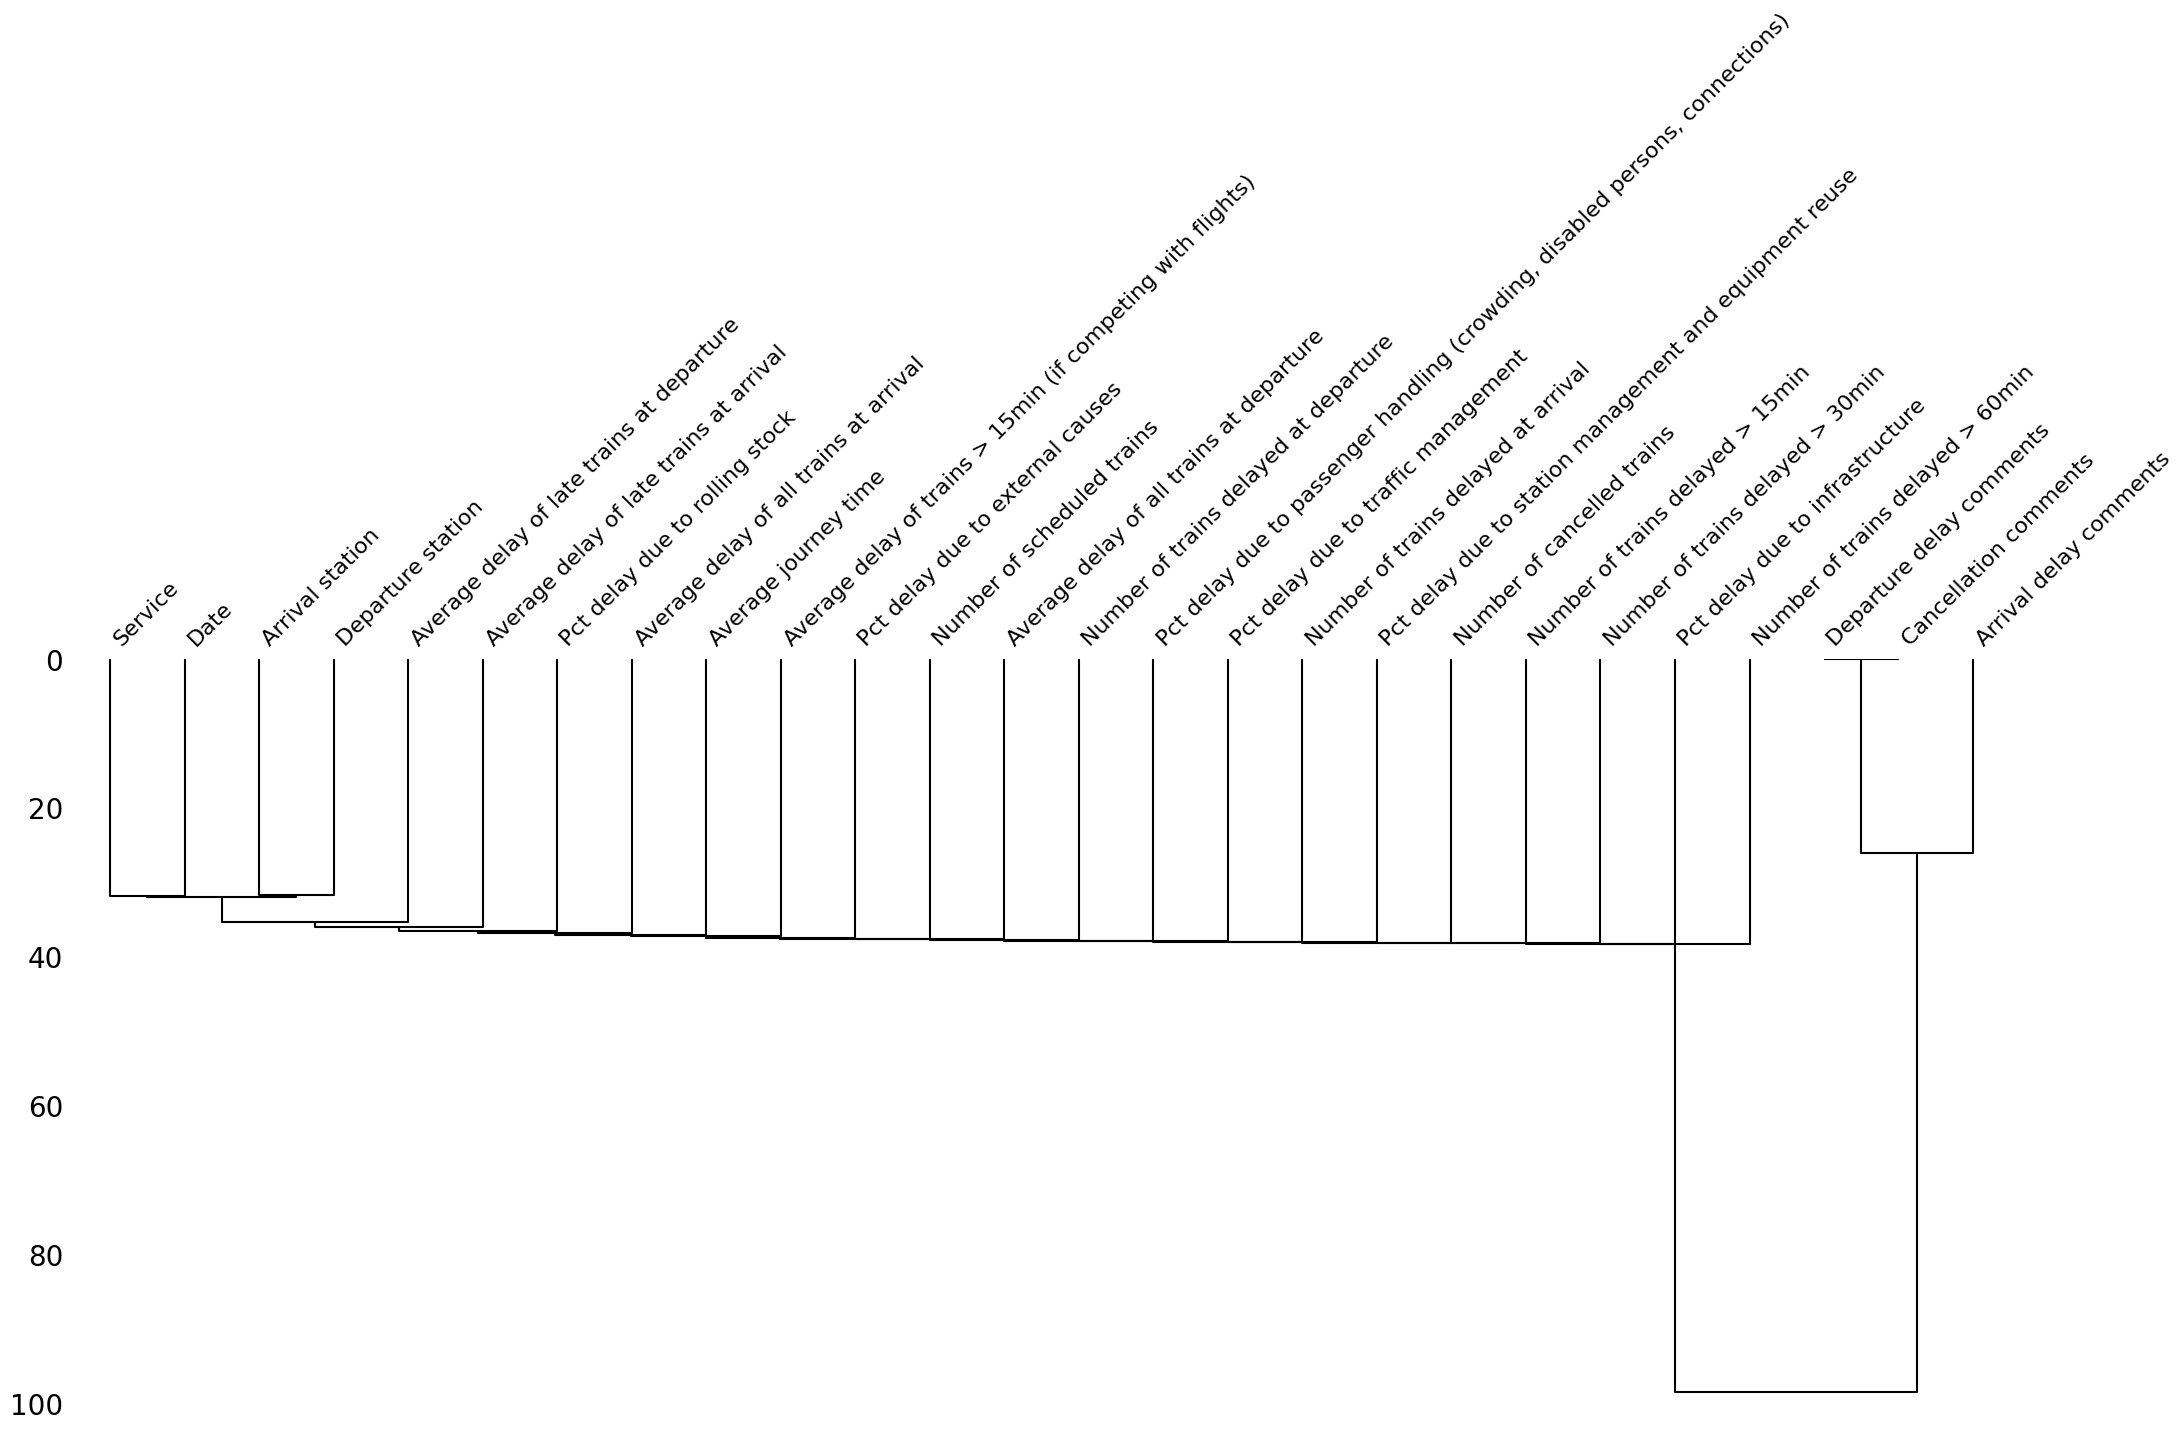

In [89]:
msno.dendrogram(data)

In [90]:
data.head()

,Date,Service,Departure station,Arrival station,Average journey time,Number of scheduled trains,Number of cancelled trains,Cancellation comments,Number of trains delayed at departure,Average delay of late trains at departure,...,Number of trains delayed > 15min,Average delay of trains > 15min (if competing with flights),Number of trains delayed > 30min,Number of trains delayed > 60min,Pct delay due to external causes,Pct delay due to infrastructure,Pct delay due to traffic management,Pct delay due to rolling stock,Pct delay due to station management and equipment reuse,"Pct delay due to passenger handling (crowding, disabled persons, connections)"
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141.0,NaN,5.0,NaN,289.0,11.247809,...,110.0,346.474287,44.0,8.0,36.134454,31.092437,10.924370,15.966387,5.042017,75.91573
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165.0,222.0,NaN,NaN,8.0,2.875000,...,22.0,5.696096,5.0,NaN,15.384615,30.769231,38.461538,11.538462,3.846154,0.00000
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220.0,248.0,1.0,NaN,37.0,9.501351,...,26.0,7.548387,17.0,7.0,26.923077,38.461538,NaN,19.230769,0.000000,0.00000
3,2018j01,National,PARIS MONTPARNASSE,ST MALO,156.0,102.0,0.0,NaN,12.0,19.912500,...,8.0,6.724757,6.0,4.0,23.076923,218.650888,7.692308,15.384615,7.692308,NaN
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61.0,391.0,2.0,NaN,61.0,NaN,...,17.0,3.346487,6.0,0.0,21.212121,42.424242,9.090909,21.212121,6.060606,0.00000


### Je choisis de supprimer les colonnes liées aux commentaires, car les valeurs sont trop manquantes et relèvent plus de MCAR

In [91]:
data.drop(columns=["Cancellation comments", "Departure delay comments", "Arrival delay comments"], inplace=True)
data

,Date,Service,Departure station,Arrival station,Average journey time,Number of scheduled trains,Number of cancelled trains,Number of trains delayed at departure,Average delay of late trains at departure,Average delay of all trains at departure,...,Number of trains delayed > 15min,Average delay of trains > 15min (if competing with flights),Number of trains delayed > 30min,Number of trains delayed > 60min,Pct delay due to external causes,Pct delay due to infrastructure,Pct delay due to traffic management,Pct delay due to rolling stock,Pct delay due to station management and equipment reuse,"Pct delay due to passenger handling (crowding, disabled persons, connections)"
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141.000000,NaN,5.0,289.0,11.247809,3.693179,...,110.0,346.474287,44.0,8.0,36.134454,31.092437,10.924370,15.966387,5.042017,75.915730
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165.000000,222.000000,NaN,8.0,2.875000,0.095796,...,22.0,5.696096,5.0,NaN,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220.000000,248.000000,1.0,37.0,9.501351,NaN,...,26.0,7.548387,17.0,7.0,26.923077,38.461538,NaN,19.230769,0.000000,0.000000
3,2018j01,National,PARIS MONTPARNASSE,ST MALO,156.000000,102.000000,0.0,12.0,19.912500,1.966667,...,8.0,6.724757,6.0,4.0,23.076923,218.650888,7.692308,15.384615,7.692308,NaN
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61.000000,391.000000,2.0,61.0,NaN,0.886889,...,17.0,3.346487,6.0,0.0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,2020-04,National,PARIS EST,STRASBOURG,NaN,40.000000,35.0,5.0,1.253333,1.253333,...,3.0,NaN,3.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
10836,2020-05,National,NaN,LYON PART DIEU,115.000000,2681.206158,14.0,46.0,6.258333,5.865986,...,5.0,47.820000,3.0,1.0,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000
10837,2021-03,National,PARIS LYON,VALENCE ALIXAN TGV,130.000000,178.000000,10.0,5.0,2.946667,-0.105060,...,4.0,66.254167,4.0,2.0,25.000000,25.000000,198.761036,25.000000,0.000000,25.000000
10838,2019-07,National,MARNE LA VALLEE,MARSEILLE ST CHARLES,217.000000,268.000000,NaN,238.0,10.391667,9.198072,...,66.0,50.361364,34.0,22.0,24.615385,15.384615,15.384615,24.615385,10.769231,9.230769


### Toutes les données de la colonne date ne sont pas manquantes. J'essaie de voir les dates renseignées avec erreur pour les corriger

In [92]:
# data["Date"] = data["Date"].astype(str).apply(lambda x: re.sub(r"[^0-9\-]", "", x))
# data

In [93]:
##data["Date"] = data["Date"].astype(str).apply(lambda x: x[:4] + '-' + x[5:] if len(x) >= 5 and x[4] != '-' else x)
##data

In [94]:
data["Date"] = pd.to_datetime(data["Date"], errors="coerce")
data["Date"] = data["Date"].ffill()


## Place à la colonne Service

In [95]:
data["Service"].mode()

0    National
Name: Service, dtype: object

In [96]:
data.columns

Index(['Date', 'Service', 'Departure station', 'Arrival station',
       'Average journey time', 'Number of scheduled trains',
       'Number of cancelled trains', 'Number of trains delayed at departure',
       'Average delay of late trains at departure',
       'Average delay of all trains at departure',
       'Number of trains delayed at arrival',
       'Average delay of late trains at arrival',
       'Average delay of all trains at arrival',
       'Number of trains delayed > 15min',
       'Average delay of trains > 15min (if competing with flights)',
       'Number of trains delayed > 30min', 'Number of trains delayed > 60min',
       'Pct delay due to external causes', 'Pct delay due to infrastructure',
       'Pct delay due to traffic management', 'Pct delay due to rolling stock',
       'Pct delay due to station management and equipment reuse',
       'Pct delay due to passenger handling (crowding, disabled persons, connections)'],
      dtype='object')

In [97]:
data.loc[:, "Service"] = data["Service"].mode()[0]
data

,Date,Service,Departure station,Arrival station,Average journey time,Number of scheduled trains,Number of cancelled trains,Number of trains delayed at departure,Average delay of late trains at departure,Average delay of all trains at departure,...,Number of trains delayed > 15min,Average delay of trains > 15min (if competing with flights),Number of trains delayed > 30min,Number of trains delayed > 60min,Pct delay due to external causes,Pct delay due to infrastructure,Pct delay due to traffic management,Pct delay due to rolling stock,Pct delay due to station management and equipment reuse,"Pct delay due to passenger handling (crowding, disabled persons, connections)"
0,2018-01-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141.000000,NaN,5.0,289.0,11.247809,3.693179,...,110.0,346.474287,44.0,8.0,36.134454,31.092437,10.924370,15.966387,5.042017,75.915730
1,2018-01-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165.000000,222.000000,NaN,8.0,2.875000,0.095796,...,22.0,5.696096,5.0,NaN,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01-01,National,PARIS MONTPARNASSE,QUIMPER,220.000000,248.000000,1.0,37.0,9.501351,NaN,...,26.0,7.548387,17.0,7.0,26.923077,38.461538,NaN,19.230769,0.000000,0.000000
3,2018-01-01,National,PARIS MONTPARNASSE,ST MALO,156.000000,102.000000,0.0,12.0,19.912500,1.966667,...,8.0,6.724757,6.0,4.0,23.076923,218.650888,7.692308,15.384615,7.692308,NaN
4,2018-01-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61.000000,391.000000,2.0,61.0,NaN,0.886889,...,17.0,3.346487,6.0,0.0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,2020-04-01,National,PARIS EST,STRASBOURG,NaN,40.000000,35.0,5.0,1.253333,1.253333,...,3.0,NaN,3.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
10836,2020-05-01,National,NaN,LYON PART DIEU,115.000000,2681.206158,14.0,46.0,6.258333,5.865986,...,5.0,47.820000,3.0,1.0,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000
10837,2021-03-01,National,PARIS LYON,VALENCE ALIXAN TGV,130.000000,178.000000,10.0,5.0,2.946667,-0.105060,...,4.0,66.254167,4.0,2.0,25.000000,25.000000,198.761036,25.000000,0.000000,25.000000
10838,2019-07-01,National,MARNE LA VALLEE,MARSEILLE ST CHARLES,217.000000,268.000000,NaN,238.0,10.391667,9.198072,...,66.0,50.361364,34.0,22.0,24.615385,15.384615,15.384615,24.615385,10.769231,9.230769


## Nettoyage les données de la colonne Departure Station

In [98]:
data["Departure station"].value_counts().tail(50)

Departure station
PARIf EST                    1
STHMALO                      1
PARIS LvON                   1
LJLLE                        1
PARISNEST                    1
PARIS MONTPARNAqSE           1
VAdENCE ALIXAN TGV           1
STUTdGART                    1
STRASBOERG                   1
RENAES                       1
CHAMBERY CHALLES LES fAUX    1
PARIS IORD                   1
PARIS LYOw                   1
FRANCAORT                    1
VALENCE ALIQAN TGV           1
LYON PART DsEU               1
PARgS LYON                   1
GRENeBLE                     1
PEqPIGNAN                    1
MARNE BA VALLEE              1
PARIS MOhTPARNASSE           1
jALENCE ALIXAN TGV           1
MARSEILLE ST CHARL2S         1
MARSEILLEpST CHARLES         1
STRASBiURG                   1
MARSEILLE ST CHARLEZ         1
DQNKERQUE                    1
PfRIS LYON                   1
MARNE LA VALLwE              1
ARRdS                        1
DUNIERQUE                    1
yARIS MONTPARNASSE   

In [99]:
cityGoodName = data["Departure station"].value_counts()[data["Departure station"].value_counts() > 4].index
cityBadName = data["Departure station"].value_counts()[data["Departure station"].value_counts() <= 4].index
print(cityBadName)

Index(['PARGS LYON', 'PAR6S LYON', 'BRE3T', 'bIMES', 'PARIS rORD',
       'LYON PART DI8U', 'PARIS L1ON', 'MONTPtLLIER', 'PARIS MONTPARNATSE',
       'PARgS NORD',
       ...
       'LYON6PART DIEU', 'PARIS MONTPfRNASSE', 'BORDEAUl ST JEAN', 'DdNKERQUE',
       'PARIS MONTPARNASEE', 'PARIx LYON', 'NANCJ', 'VALENCE ALIXAN TxV',
       'PARIz LYON', 'PARIS MONTPARNAZSE'],
      dtype='object', name='Departure station', length=287)


In [100]:
from rapidfuzz import process

def correctNameCity(goods, bad):
    if bad in cityBadName:
        matches = process.extract(bad, goods, limit=3)
        ##[("Paris", 100%), ("Pares", 98%), ("Pais", 75%)]
        return matches[0][0]
    return bad
data["Departure station"] = data["Departure station"].astype(str).apply(lambda x: correctNameCity(cityGoodName, x))
data

,Date,Service,Departure station,Arrival station,Average journey time,Number of scheduled trains,Number of cancelled trains,Number of trains delayed at departure,Average delay of late trains at departure,Average delay of all trains at departure,...,Number of trains delayed > 15min,Average delay of trains > 15min (if competing with flights),Number of trains delayed > 30min,Number of trains delayed > 60min,Pct delay due to external causes,Pct delay due to infrastructure,Pct delay due to traffic management,Pct delay due to rolling stock,Pct delay due to station management and equipment reuse,"Pct delay due to passenger handling (crowding, disabled persons, connections)"
0,2018-01-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141.000000,NaN,5.0,289.0,11.247809,3.693179,...,110.0,346.474287,44.0,8.0,36.134454,31.092437,10.924370,15.966387,5.042017,75.915730
1,2018-01-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165.000000,222.000000,NaN,8.0,2.875000,0.095796,...,22.0,5.696096,5.0,NaN,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01-01,National,PARIS MONTPARNASSE,QUIMPER,220.000000,248.000000,1.0,37.0,9.501351,NaN,...,26.0,7.548387,17.0,7.0,26.923077,38.461538,NaN,19.230769,0.000000,0.000000
3,2018-01-01,National,PARIS MONTPARNASSE,ST MALO,156.000000,102.000000,0.0,12.0,19.912500,1.966667,...,8.0,6.724757,6.0,4.0,23.076923,218.650888,7.692308,15.384615,7.692308,NaN
4,2018-01-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61.000000,391.000000,2.0,61.0,NaN,0.886889,...,17.0,3.346487,6.0,0.0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,2020-04-01,National,PARIS EST,STRASBOURG,NaN,40.000000,35.0,5.0,1.253333,1.253333,...,3.0,NaN,3.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
10836,2020-05-01,National,nan,LYON PART DIEU,115.000000,2681.206158,14.0,46.0,6.258333,5.865986,...,5.0,47.820000,3.0,1.0,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000
10837,2021-03-01,National,PARIS LYON,VALENCE ALIXAN TGV,130.000000,178.000000,10.0,5.0,2.946667,-0.105060,...,4.0,66.254167,4.0,2.0,25.000000,25.000000,198.761036,25.000000,0.000000,25.000000
10838,2019-07-01,National,MARNE LA VALLEE,MARSEILLE ST CHARLES,217.000000,268.000000,NaN,238.0,10.391667,9.198072,...,66.0,50.361364,34.0,22.0,24.615385,15.384615,15.384615,24.615385,10.769231,9.230769


In [101]:
data["Departure station"] = data["Departure station"].replace(["NaN", "nan", "None", ""], np.nan)

In [102]:
data["Departure station"].isna().sum()

np.int64(531)

In [103]:
data["Departure station"] = data["Departure station"].ffill()
data

,Date,Service,Departure station,Arrival station,Average journey time,Number of scheduled trains,Number of cancelled trains,Number of trains delayed at departure,Average delay of late trains at departure,Average delay of all trains at departure,...,Number of trains delayed > 15min,Average delay of trains > 15min (if competing with flights),Number of trains delayed > 30min,Number of trains delayed > 60min,Pct delay due to external causes,Pct delay due to infrastructure,Pct delay due to traffic management,Pct delay due to rolling stock,Pct delay due to station management and equipment reuse,"Pct delay due to passenger handling (crowding, disabled persons, connections)"
0,2018-01-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141.000000,NaN,5.0,289.0,11.247809,3.693179,...,110.0,346.474287,44.0,8.0,36.134454,31.092437,10.924370,15.966387,5.042017,75.915730
1,2018-01-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165.000000,222.000000,NaN,8.0,2.875000,0.095796,...,22.0,5.696096,5.0,NaN,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01-01,National,PARIS MONTPARNASSE,QUIMPER,220.000000,248.000000,1.0,37.0,9.501351,NaN,...,26.0,7.548387,17.0,7.0,26.923077,38.461538,NaN,19.230769,0.000000,0.000000
3,2018-01-01,National,PARIS MONTPARNASSE,ST MALO,156.000000,102.000000,0.0,12.0,19.912500,1.966667,...,8.0,6.724757,6.0,4.0,23.076923,218.650888,7.692308,15.384615,7.692308,NaN
4,2018-01-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61.000000,391.000000,2.0,61.0,NaN,0.886889,...,17.0,3.346487,6.0,0.0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,2020-04-01,National,PARIS EST,STRASBOURG,NaN,40.000000,35.0,5.0,1.253333,1.253333,...,3.0,NaN,3.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
10836,2020-05-01,National,PARIS EST,LYON PART DIEU,115.000000,2681.206158,14.0,46.0,6.258333,5.865986,...,5.0,47.820000,3.0,1.0,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000
10837,2021-03-01,National,PARIS LYON,VALENCE ALIXAN TGV,130.000000,178.000000,10.0,5.0,2.946667,-0.105060,...,4.0,66.254167,4.0,2.0,25.000000,25.000000,198.761036,25.000000,0.000000,25.000000
10838,2019-07-01,National,MARNE LA VALLEE,MARSEILLE ST CHARLES,217.000000,268.000000,NaN,238.0,10.391667,9.198072,...,66.0,50.361364,34.0,22.0,24.615385,15.384615,15.384615,24.615385,10.769231,9.230769


## Place à l'Arrival station

In [104]:
cityGoodName = data["Arrival station"].value_counts()[data["Arrival station"].value_counts() > 4].index
cityBadName = data["Arrival station"].value_counts()[data["Arrival station"].value_counts() < 4].index
print(cityBadName)

Index(['LYOE PART DIEU', 'TOURCOItG', 'PzRIS EST', 'ARWAS', 'LYON PARU DIEU',
       'TELLEGARDE (AIN)', 'BESJNCON FRANCHE COMTE TGV', 'TOURCOxNG',
       'PARISkLYON', 'LYON PlRT DIEU',
       ...
       'PARPS LYON', 'LA ROCHELLE VILLM', 'FRANCFOST', 'PAOIS NORD',
       'PARIS MONTPARNASvE', 'ST VIERRE DES CORPS', 'PARIS NONTPARNASSE',
       'PAHIS LYON', 'PARIS MONTPARNASUE', 'PARIS MONTPARVASSE'],
      dtype='object', name='Arrival station', length=284)


In [105]:
def correctNameCity(goods, bad):
    if bad in cityBadName:
        matches = process.extract(bad, goods, limit=3)
        return matches[0][0]
    return bad
data["Arrival station"] = data["Arrival station"].astype(str).apply(lambda x: correctNameCity(cityGoodName, x))
data

,Date,Service,Departure station,Arrival station,Average journey time,Number of scheduled trains,Number of cancelled trains,Number of trains delayed at departure,Average delay of late trains at departure,Average delay of all trains at departure,...,Number of trains delayed > 15min,Average delay of trains > 15min (if competing with flights),Number of trains delayed > 30min,Number of trains delayed > 60min,Pct delay due to external causes,Pct delay due to infrastructure,Pct delay due to traffic management,Pct delay due to rolling stock,Pct delay due to station management and equipment reuse,"Pct delay due to passenger handling (crowding, disabled persons, connections)"
0,2018-01-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141.000000,NaN,5.0,289.0,11.247809,3.693179,...,110.0,346.474287,44.0,8.0,36.134454,31.092437,10.924370,15.966387,5.042017,75.915730
1,2018-01-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165.000000,222.000000,NaN,8.0,2.875000,0.095796,...,22.0,5.696096,5.0,NaN,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01-01,National,PARIS MONTPARNASSE,QUIMPER,220.000000,248.000000,1.0,37.0,9.501351,NaN,...,26.0,7.548387,17.0,7.0,26.923077,38.461538,NaN,19.230769,0.000000,0.000000
3,2018-01-01,National,PARIS MONTPARNASSE,ST MALO,156.000000,102.000000,0.0,12.0,19.912500,1.966667,...,8.0,6.724757,6.0,4.0,23.076923,218.650888,7.692308,15.384615,7.692308,NaN
4,2018-01-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61.000000,391.000000,2.0,61.0,NaN,0.886889,...,17.0,3.346487,6.0,0.0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,2020-04-01,National,PARIS EST,STRASBOURG,NaN,40.000000,35.0,5.0,1.253333,1.253333,...,3.0,NaN,3.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
10836,2020-05-01,National,PARIS EST,LYON PART DIEU,115.000000,2681.206158,14.0,46.0,6.258333,5.865986,...,5.0,47.820000,3.0,1.0,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000
10837,2021-03-01,National,PARIS LYON,VALENCE ALIXAN TGV,130.000000,178.000000,10.0,5.0,2.946667,-0.105060,...,4.0,66.254167,4.0,2.0,25.000000,25.000000,198.761036,25.000000,0.000000,25.000000
10838,2019-07-01,National,MARNE LA VALLEE,MARSEILLE ST CHARLES,217.000000,268.000000,NaN,238.0,10.391667,9.198072,...,66.0,50.361364,34.0,22.0,24.615385,15.384615,15.384615,24.615385,10.769231,9.230769


In [106]:
data["Arrival station"] = data["Arrival station"].replace(["NaN", "nan", "None", ""], np.nan)
data["Arrival station"].isna().sum()

np.int64(536)

In [107]:
data["Arrival station"] = data["Arrival station"].ffill()

## Place aux colonnes avec chiffres

### Traitement des données aberrantes

#### Average journey time

In [108]:
data

,Date,Service,Departure station,Arrival station,Average journey time,Number of scheduled trains,Number of cancelled trains,Number of trains delayed at departure,Average delay of late trains at departure,Average delay of all trains at departure,...,Number of trains delayed > 15min,Average delay of trains > 15min (if competing with flights),Number of trains delayed > 30min,Number of trains delayed > 60min,Pct delay due to external causes,Pct delay due to infrastructure,Pct delay due to traffic management,Pct delay due to rolling stock,Pct delay due to station management and equipment reuse,"Pct delay due to passenger handling (crowding, disabled persons, connections)"
0,2018-01-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141.000000,NaN,5.0,289.0,11.247809,3.693179,...,110.0,346.474287,44.0,8.0,36.134454,31.092437,10.924370,15.966387,5.042017,75.915730
1,2018-01-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165.000000,222.000000,NaN,8.0,2.875000,0.095796,...,22.0,5.696096,5.0,NaN,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01-01,National,PARIS MONTPARNASSE,QUIMPER,220.000000,248.000000,1.0,37.0,9.501351,NaN,...,26.0,7.548387,17.0,7.0,26.923077,38.461538,NaN,19.230769,0.000000,0.000000
3,2018-01-01,National,PARIS MONTPARNASSE,ST MALO,156.000000,102.000000,0.0,12.0,19.912500,1.966667,...,8.0,6.724757,6.0,4.0,23.076923,218.650888,7.692308,15.384615,7.692308,NaN
4,2018-01-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61.000000,391.000000,2.0,61.0,NaN,0.886889,...,17.0,3.346487,6.0,0.0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,2020-04-01,National,PARIS EST,STRASBOURG,NaN,40.000000,35.0,5.0,1.253333,1.253333,...,3.0,NaN,3.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
10836,2020-05-01,National,PARIS EST,LYON PART DIEU,115.000000,2681.206158,14.0,46.0,6.258333,5.865986,...,5.0,47.820000,3.0,1.0,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000
10837,2021-03-01,National,PARIS LYON,VALENCE ALIXAN TGV,130.000000,178.000000,10.0,5.0,2.946667,-0.105060,...,4.0,66.254167,4.0,2.0,25.000000,25.000000,198.761036,25.000000,0.000000,25.000000
10838,2019-07-01,National,MARNE LA VALLEE,MARSEILLE ST CHARLES,217.000000,268.000000,NaN,238.0,10.391667,9.198072,...,66.0,50.361364,34.0,22.0,24.615385,15.384615,15.384615,24.615385,10.769231,9.230769


In [109]:
Q1 = data["Average journey time"].quantile(0.25)
Q3 = data["Average journey time"].quantile(0.75)
IQR = Q3 - Q1
data_median = data["Average journey time"].median()
print(f"{Q1}\n{Q3}\n{IQR}")

104.0
230.0
126.0


In [110]:
##Q1 = 104.0 ; Q3 = 230.0 ; IQR = 126.0
##L'IQR étant plus proche du Q1, on en conclut qu'il y a plus de données aberrantes
##On ne peut donc pas utiliser la moyenne pour remplacer les données manquantes
##Car la moyenne serait biaisée par les valeurs aberrantes auxquelles elle est sensible

In [111]:
data["Average journey time"] = data["Average journey time"].mask((data["Average journey time"] < Q1 - 1.5 * IQR) | (data["Average journey time"] > Q3 + 1.5 * IQR), data_median)
data

,Date,Service,Departure station,Arrival station,Average journey time,Number of scheduled trains,Number of cancelled trains,Number of trains delayed at departure,Average delay of late trains at departure,Average delay of all trains at departure,...,Number of trains delayed > 15min,Average delay of trains > 15min (if competing with flights),Number of trains delayed > 30min,Number of trains delayed > 60min,Pct delay due to external causes,Pct delay due to infrastructure,Pct delay due to traffic management,Pct delay due to rolling stock,Pct delay due to station management and equipment reuse,"Pct delay due to passenger handling (crowding, disabled persons, connections)"
0,2018-01-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141.0,NaN,5.0,289.0,11.247809,3.693179,...,110.0,346.474287,44.0,8.0,36.134454,31.092437,10.924370,15.966387,5.042017,75.915730
1,2018-01-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165.0,222.000000,NaN,8.0,2.875000,0.095796,...,22.0,5.696096,5.0,NaN,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01-01,National,PARIS MONTPARNASSE,QUIMPER,220.0,248.000000,1.0,37.0,9.501351,NaN,...,26.0,7.548387,17.0,7.0,26.923077,38.461538,NaN,19.230769,0.000000,0.000000
3,2018-01-01,National,PARIS MONTPARNASSE,ST MALO,156.0,102.000000,0.0,12.0,19.912500,1.966667,...,8.0,6.724757,6.0,4.0,23.076923,218.650888,7.692308,15.384615,7.692308,NaN
4,2018-01-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61.0,391.000000,2.0,61.0,NaN,0.886889,...,17.0,3.346487,6.0,0.0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,2020-04-01,National,PARIS EST,STRASBOURG,NaN,40.000000,35.0,5.0,1.253333,1.253333,...,3.0,NaN,3.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
10836,2020-05-01,National,PARIS EST,LYON PART DIEU,115.0,2681.206158,14.0,46.0,6.258333,5.865986,...,5.0,47.820000,3.0,1.0,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000
10837,2021-03-01,National,PARIS LYON,VALENCE ALIXAN TGV,130.0,178.000000,10.0,5.0,2.946667,-0.105060,...,4.0,66.254167,4.0,2.0,25.000000,25.000000,198.761036,25.000000,0.000000,25.000000
10838,2019-07-01,National,MARNE LA VALLEE,MARSEILLE ST CHARLES,217.0,268.000000,NaN,238.0,10.391667,9.198072,...,66.0,50.361364,34.0,22.0,24.615385,15.384615,15.384615,24.615385,10.769231,9.230769


In [112]:
data["Average journey time"] = data["Average journey time"].replace(["NaN", "nan", "None", ""], np.nan)

In [113]:
new_median = data["Average journey time"].median()
data["Average journey time"] = data["Average journey time"].fillna(new_median)
data

,Date,Service,Departure station,Arrival station,Average journey time,Number of scheduled trains,Number of cancelled trains,Number of trains delayed at departure,Average delay of late trains at departure,Average delay of all trains at departure,...,Number of trains delayed > 15min,Average delay of trains > 15min (if competing with flights),Number of trains delayed > 30min,Number of trains delayed > 60min,Pct delay due to external causes,Pct delay due to infrastructure,Pct delay due to traffic management,Pct delay due to rolling stock,Pct delay due to station management and equipment reuse,"Pct delay due to passenger handling (crowding, disabled persons, connections)"
0,2018-01-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141.0,NaN,5.0,289.0,11.247809,3.693179,...,110.0,346.474287,44.0,8.0,36.134454,31.092437,10.924370,15.966387,5.042017,75.915730
1,2018-01-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165.0,222.000000,NaN,8.0,2.875000,0.095796,...,22.0,5.696096,5.0,NaN,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01-01,National,PARIS MONTPARNASSE,QUIMPER,220.0,248.000000,1.0,37.0,9.501351,NaN,...,26.0,7.548387,17.0,7.0,26.923077,38.461538,NaN,19.230769,0.000000,0.000000
3,2018-01-01,National,PARIS MONTPARNASSE,ST MALO,156.0,102.000000,0.0,12.0,19.912500,1.966667,...,8.0,6.724757,6.0,4.0,23.076923,218.650888,7.692308,15.384615,7.692308,NaN
4,2018-01-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61.0,391.000000,2.0,61.0,NaN,0.886889,...,17.0,3.346487,6.0,0.0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,2020-04-01,National,PARIS EST,STRASBOURG,168.0,40.000000,35.0,5.0,1.253333,1.253333,...,3.0,NaN,3.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
10836,2020-05-01,National,PARIS EST,LYON PART DIEU,115.0,2681.206158,14.0,46.0,6.258333,5.865986,...,5.0,47.820000,3.0,1.0,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000
10837,2021-03-01,National,PARIS LYON,VALENCE ALIXAN TGV,130.0,178.000000,10.0,5.0,2.946667,-0.105060,...,4.0,66.254167,4.0,2.0,25.000000,25.000000,198.761036,25.000000,0.000000,25.000000
10838,2019-07-01,National,MARNE LA VALLEE,MARSEILLE ST CHARLES,217.0,268.000000,NaN,238.0,10.391667,9.198072,...,66.0,50.361364,34.0,22.0,24.615385,15.384615,15.384615,24.615385,10.769231,9.230769


In [114]:
data.columns

Index(['Date', 'Service', 'Departure station', 'Arrival station',
       'Average journey time', 'Number of scheduled trains',
       'Number of cancelled trains', 'Number of trains delayed at departure',
       'Average delay of late trains at departure',
       'Average delay of all trains at departure',
       'Number of trains delayed at arrival',
       'Average delay of late trains at arrival',
       'Average delay of all trains at arrival',
       'Number of trains delayed > 15min',
       'Average delay of trains > 15min (if competing with flights)',
       'Number of trains delayed > 30min', 'Number of trains delayed > 60min',
       'Pct delay due to external causes', 'Pct delay due to infrastructure',
       'Pct delay due to traffic management', 'Pct delay due to rolling stock',
       'Pct delay due to station management and equipment reuse',
       'Pct delay due to passenger handling (crowding, disabled persons, connections)'],
      dtype='object')

#### Number of scheduled trains

In [115]:
for colum in data.columns:
    data[colum] = data[colum].replace(["NaN", "nan", "None", ""], np.nan)

In [116]:
for colum in data.columns:
    ready = np.array(["Date", "Service", "Departure station", "Arrival station", "Average journey time"])
    if (colum not in ready):
        new_median = data[colum].median()
        data[colum] = data[colum].fillna(new_median)
    else:
        continue

In [117]:
data

,Date,Service,Departure station,Arrival station,Average journey time,Number of scheduled trains,Number of cancelled trains,Number of trains delayed at departure,Average delay of late trains at departure,Average delay of all trains at departure,...,Number of trains delayed > 15min,Average delay of trains > 15min (if competing with flights),Number of trains delayed > 30min,Number of trains delayed > 60min,Pct delay due to external causes,Pct delay due to infrastructure,Pct delay due to traffic management,Pct delay due to rolling stock,Pct delay due to station management and equipment reuse,"Pct delay due to passenger handling (crowding, disabled persons, connections)"
0,2018-01-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141.0,236.000000,5.0,289.0,11.247809,3.693179,...,110.0,346.474287,44.0,8.0,36.134454,31.092437,10.924370,15.966387,5.042017,75.915730
1,2018-01-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165.0,222.000000,2.0,8.0,2.875000,0.095796,...,22.0,5.696096,5.0,3.0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01-01,National,PARIS MONTPARNASSE,QUIMPER,220.0,248.000000,1.0,37.0,9.501351,2.425521,...,26.0,7.548387,17.0,7.0,26.923077,38.461538,19.047619,19.230769,0.000000,0.000000
3,2018-01-01,National,PARIS MONTPARNASSE,ST MALO,156.0,102.000000,0.0,12.0,19.912500,1.966667,...,8.0,6.724757,6.0,4.0,23.076923,218.650888,7.692308,15.384615,7.692308,5.319149
4,2018-01-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61.0,391.000000,2.0,61.0,10.301125,0.886889,...,17.0,3.346487,6.0,0.0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,2020-04-01,National,PARIS EST,STRASBOURG,168.0,40.000000,35.0,5.0,1.253333,1.253333,...,3.0,37.238095,3.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.319149
10836,2020-05-01,National,PARIS EST,LYON PART DIEU,115.0,2681.206158,14.0,46.0,6.258333,5.865986,...,5.0,47.820000,3.0,1.0,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000
10837,2021-03-01,National,PARIS LYON,VALENCE ALIXAN TGV,130.0,178.000000,10.0,5.0,2.946667,-0.105060,...,4.0,66.254167,4.0,2.0,25.000000,25.000000,198.761036,25.000000,0.000000,25.000000
10838,2019-07-01,National,MARNE LA VALLEE,MARSEILLE ST CHARLES,217.0,268.000000,2.0,238.0,10.391667,9.198072,...,66.0,50.361364,34.0,22.0,24.615385,15.384615,15.384615,24.615385,10.769231,9.230769


In [118]:
data.to_csv("dataset_cleaned.csv", index=False)

In [119]:
data['Number of scheduled trains'] = data['Number of scheduled trains'].astype(int)

In [120]:
type_conversion = {'Number of cancelled trains': 'int32',
                   'Number of trains delayed at departure': 'int32',
                   'Number of trains delayed > 15min': 'int32',
                   'Number of trains delayed > 30min': 'int32',
                   'Number of trains delayed > 60min': 'int32',
                   'Number of trains delayed at arrival': 'int32',
                   }
data = data.astype(type_conversion)

In [121]:
data.dtypes

Date                                                                             datetime64[ns]
Service                                                                                  object
Departure station                                                                        object
Arrival station                                                                          object
Average journey time                                                                    float64
Number of scheduled trains                                                                int64
Number of cancelled trains                                                                int32
Number of trains delayed at departure                                                     int32
Average delay of late trains at departure                                               float64
Average delay of all trains at departure                                                float64
Number of trains delayed at arrival     

In [122]:
rouded_columns = ['Average journey time',
                  'Average delay of late trains at departure',
                  'Average delay of all trains at departure',
                  'Average delay of late trains at arrival',
                  'Average delay of all trains at arrival',
                  'Average delay of trains > 15min (if competing with flights)',
                  'Pct delay due to external causes',
                  'Pct delay due to infrastructure',
                  'Pct delay due to traffic management',
                  'Pct delay due to rolling stock',
                  'Pct delay due to station management and equipment reuse',
                  'Pct delay due to passenger handling (crowding, disabled persons, connections)',
                  ]
data[rouded_columns] = data[rouded_columns].round(2)

In [123]:
data.dtypes

Date                                                                             datetime64[ns]
Service                                                                                  object
Departure station                                                                        object
Arrival station                                                                          object
Average journey time                                                                    float64
Number of scheduled trains                                                                int64
Number of cancelled trains                                                                int32
Number of trains delayed at departure                                                     int32
Average delay of late trains at departure                                               float64
Average delay of all trains at departure                                                float64
Number of trains delayed at arrival     

In [124]:
data['Month'] = data['Date'].dt.month

In [125]:
months_delay = data.loc[:, ['Month', 'Number of scheduled trains', 'Number of trains delayed at departure']]

In [126]:
months_delay

,Month,Number of scheduled trains,Number of trains delayed at departure
0,1,236,289
1,1,222,8
2,1,248,37
3,1,102,12
4,1,391,61
...,...,...,...
10835,4,40,5
10836,5,2681,46
10837,3,178,5
10838,7,268,238


In [127]:
months_delay.set_index('Month')

,Number of scheduled trains,Number of trains delayed at departure
Month,,
1,236,289
1,222,8
1,248,37
1,102,12
1,391,61
...,...,...
4,40,5
5,2681,46
3,178,5


In [128]:
months_delay['Number of scheduled trains'].sum()

np.int64(4086868)

## Les mois avec les plus de retard

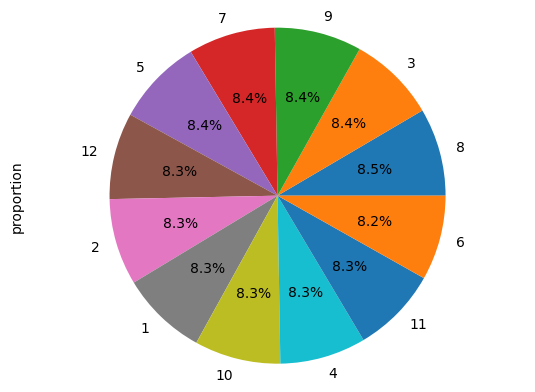

In [129]:
data.Month.value_counts(normalize=True).plot.pie(autopct="%1.1f%%")
plt.axis('equal')
plt.show()

## Répartition du retard des trains selon le nombre de voyages prévus

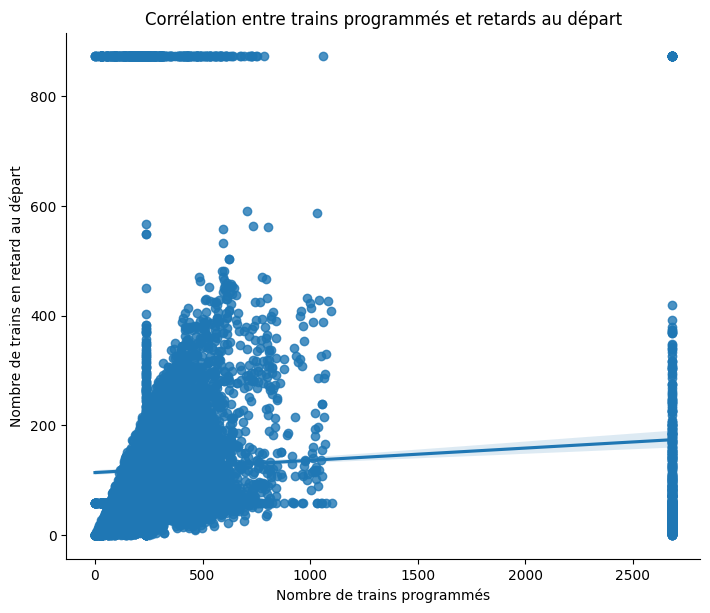

In [130]:
# Sélection des colonnes d'intérêt
cols = ['Number of scheduled trains', 'Number of trains delayed at departure']
subset = data.loc[:, cols]

# Affichage du nuage de points avec régression
sns.lmplot(data=subset, x=cols[0], y=cols[1], height=6, aspect=1.2)
plt.title('Corrélation entre trains programmés et retards au départ')
plt.xlabel('Nombre de trains programmés')
plt.ylabel('Nombre de trains en retard au départ')
plt.show()

In [131]:
data[data['Number of scheduled trains'] >= 1500]['Month'].value_counts()

Month
9     52
6     51
7     48
12    48
5     47
2     46
11    43
4     41
3     40
8     37
1     36
10    34
Name: count, dtype: int64

In [132]:
data

,Date,Service,Departure station,Arrival station,Average journey time,Number of scheduled trains,Number of cancelled trains,Number of trains delayed at departure,Average delay of late trains at departure,Average delay of all trains at departure,...,Average delay of trains > 15min (if competing with flights),Number of trains delayed > 30min,Number of trains delayed > 60min,Pct delay due to external causes,Pct delay due to infrastructure,Pct delay due to traffic management,Pct delay due to rolling stock,Pct delay due to station management and equipment reuse,"Pct delay due to passenger handling (crowding, disabled persons, connections)",Month
0,2018-01-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141.0,236,5,289,11.25,3.69,...,346.47,44,8,36.13,31.09,10.92,15.97,5.04,75.92,1
1,2018-01-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165.0,222,2,8,2.88,0.10,...,5.70,5,3,15.38,30.77,38.46,11.54,3.85,0.00,1
2,2018-01-01,National,PARIS MONTPARNASSE,QUIMPER,220.0,248,1,37,9.50,2.43,...,7.55,17,7,26.92,38.46,19.05,19.23,0.00,0.00,1
3,2018-01-01,National,PARIS MONTPARNASSE,ST MALO,156.0,102,0,12,19.91,1.97,...,6.72,6,4,23.08,218.65,7.69,15.38,7.69,5.32,1
4,2018-01-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61.0,391,2,61,10.30,0.89,...,3.35,6,0,21.21,42.42,9.09,21.21,6.06,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,2020-04-01,National,PARIS EST,STRASBOURG,168.0,40,35,5,1.25,1.25,...,37.24,3,0,0.00,0.00,0.00,0.00,0.00,5.32,4
10836,2020-05-01,National,PARIS EST,LYON PART DIEU,115.0,2681,14,46,6.26,5.87,...,47.82,3,1,0.00,50.00,0.00,0.00,50.00,0.00,5
10837,2021-03-01,National,PARIS LYON,VALENCE ALIXAN TGV,130.0,178,10,5,2.95,-0.11,...,66.25,4,2,25.00,25.00,198.76,25.00,0.00,25.00,3
10838,2019-07-01,National,MARNE LA VALLEE,MARSEILLE ST CHARLES,217.0,268,2,238,10.39,9.20,...,50.36,34,22,24.62,15.38,15.38,24.62,10.77,9.23,7


In [133]:
inexact_delay = data[data['Number of scheduled trains'] < data['Number of trains delayed at departure']]

In [134]:
data['trains_delay'] = data['Number of trains delayed > 15min'] + data['Number of trains delayed > 30min'] + data['Number of trains delayed > 60min']

#### Je constate que sur plusieurs lignes, le nombre de train en retard au départ est supérieur au nombre de trains programmés. C'est inexact !

In [135]:
data['Number of trains delayed at departure'] = (inexact_delay['Average delay of late trains at departure'] * inexact_delay['Number of scheduled trains']) / 100

In [136]:
data

,Date,Service,Departure station,Arrival station,Average journey time,Number of scheduled trains,Number of cancelled trains,Number of trains delayed at departure,Average delay of late trains at departure,Average delay of all trains at departure,...,Number of trains delayed > 30min,Number of trains delayed > 60min,Pct delay due to external causes,Pct delay due to infrastructure,Pct delay due to traffic management,Pct delay due to rolling stock,Pct delay due to station management and equipment reuse,"Pct delay due to passenger handling (crowding, disabled persons, connections)",Month,trains_delay
0,2018-01-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141.0,236,5,26.55,11.25,3.69,...,44,8,36.13,31.09,10.92,15.97,5.04,75.92,1,162
1,2018-01-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165.0,222,2,NaN,2.88,0.10,...,5,3,15.38,30.77,38.46,11.54,3.85,0.00,1,30
2,2018-01-01,National,PARIS MONTPARNASSE,QUIMPER,220.0,248,1,NaN,9.50,2.43,...,17,7,26.92,38.46,19.05,19.23,0.00,0.00,1,50
3,2018-01-01,National,PARIS MONTPARNASSE,ST MALO,156.0,102,0,NaN,19.91,1.97,...,6,4,23.08,218.65,7.69,15.38,7.69,5.32,1,18
4,2018-01-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61.0,391,2,NaN,10.30,0.89,...,6,0,21.21,42.42,9.09,21.21,6.06,0.00,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,2020-04-01,National,PARIS EST,STRASBOURG,168.0,40,35,NaN,1.25,1.25,...,3,0,0.00,0.00,0.00,0.00,0.00,5.32,4,6
10836,2020-05-01,National,PARIS EST,LYON PART DIEU,115.0,2681,14,NaN,6.26,5.87,...,3,1,0.00,50.00,0.00,0.00,50.00,0.00,5,9
10837,2021-03-01,National,PARIS LYON,VALENCE ALIXAN TGV,130.0,178,10,NaN,2.95,-0.11,...,4,2,25.00,25.00,198.76,25.00,0.00,25.00,3,10
10838,2019-07-01,National,MARNE LA VALLEE,MARSEILLE ST CHARLES,217.0,268,2,NaN,10.39,9.20,...,34,22,24.62,15.38,15.38,24.62,10.77,9.23,7,122


## Retard par mois

In [137]:
months_delay = data.loc[:, ['Month', 'Number of scheduled trains', 'trains_delay']]
delays_month = months_delay['Month'].unique()
delays_month = pd.Series(delays_month)
delay_per_month = pd.Series(0, index=range(12))
frame = {'Month': delays_month,
         'number_trains_delay': delay_per_month
         }
delays_month = pd.DataFrame(frame)
for i in range(13):
    delays_month.loc[i - 1, 'number_trains_delay'] = months_delay[months_delay['Month'] == i]['trains_delay'].sum()
delay_per_month.dropna(inplace=True)
delays_month

,Month,number_trains_delay
0,1.0,53517.0
1,2.0,49010.0
2,3.0,51655.0
3,4.0,44071.0
4,5.0,48023.0
5,6.0,58793.0
6,7.0,72117.0
7,8.0,57934.0
8,9.0,56570.0
9,10.0,56691.0


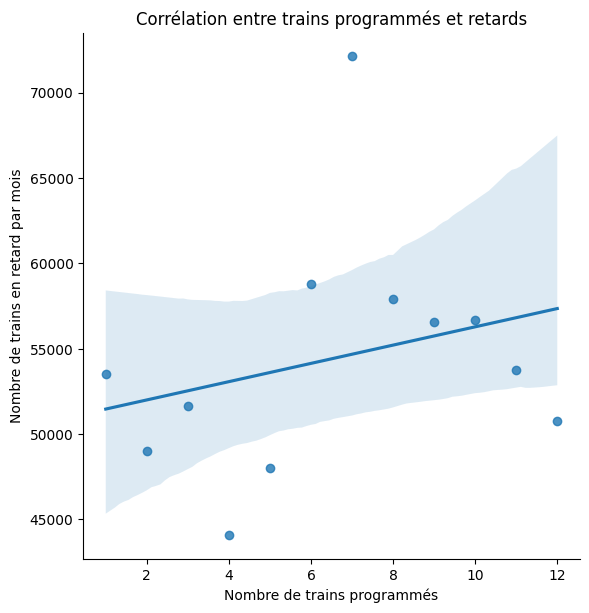

In [138]:
# Sélection des colonnes d'intérêt
cols = ['Month', 'number_trains_delay']
subset = delays_month.loc[:, cols]

# Affichage du nuage de points avec régression
sns.lmplot(subset, x=cols[0], y=cols[1], height=6)
plt.title('Corrélation entre trains programmés et retards')
plt.xlabel('Nombre de trains programmés')
plt.ylabel('Nombre de trains en retard par mois')
plt.show()